In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
import seaborn as sns
%matplotlib inline

import matplotlib.style
matplotlib.style.use('ggplot')

In [3]:
# Read carriers to an easy dictionary (for fast lookup)
carriers_dict = pd.Series.from_csv('carriers.csv').to_dict()

# Read flights
flights = pd.read_csv('january_2016.csv')

# Read airports
airports = pd.read_csv('airports new2.csv')

# Join flights with airport data
airports.set_index('iata')
airports_from = airports.copy()
airports_from.columns = airports_from.columns.map(lambda x: 'origin_' + str(x))
flights = pd.merge(flights, airports_from, how='inner', left_on='ORIGIN', right_on='origin_iata')
airports_to = airports.copy()
airports_to.columns = airports.columns.map(lambda x: 'dest_' + str(x))
flights = pd.merge(flights, airports_to, how='inner', left_on='DEST', right_on='dest_iata')
#for i in flights.columns:
    #if flights[i].isnull().sum() > 300000:
        #flights.drop(i, axis = 1, inplace = True)

# Clean date
flights['FL_DATE']= pd.to_datetime(flights['FL_DATE'], infer_datetime_format=True)

# Replace NaN delays (no delay) with 0
delay_types = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
flights[delay_types] = flights[delay_types].fillna(0)

# Create a cancelled and uncancelled list
c_flights = flights[flights.CANCELLED == 1]
uc_flights = flights[flights.CANCELLED == 0]

# Check the data
num_flights, _ = uc_flights.shape
print("%d flights loaded" % num_flights)
uc_flights.head(5)

C:\Anaconda\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


433453 flights loaded


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,origin_country,origin_lat,origin_long,dest_iata,dest_airport,dest_city,dest_state,dest_country,dest_lat,dest_long
0,1,28,4,2016-01-28,UA,N76514,604,PHX,DEN,943,...,USA,33.434167,-112.008056,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002
1,1,28,4,2016-01-28,UA,N451UA,792,PHX,DEN,1846,...,USA,33.434167,-112.008056,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002
2,1,28,4,2016-01-28,UA,N492UA,1185,PHX,DEN,1056,...,USA,33.434167,-112.008056,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002
3,1,26,2,2016-01-26,UA,N76254,489,PHX,DEN,700,...,USA,33.434167,-112.008056,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002
4,1,26,2,2016-01-26,UA,N38443,604,PHX,DEN,938,...,USA,33.434167,-112.008056,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002


In [4]:
flights.shape

(445112, 43)

In [5]:
c_flights.head(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,origin_country,origin_lat,origin_long,dest_iata,dest_airport,dest_city,dest_state,dest_country,dest_lat,dest_long
173,1,8,5,2016-01-08,WN,N8316H,1383,PHX,DEN,715,...,USA,33.434167,-112.008056,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002
215,1,16,6,2016-01-16,UA,N456UA,1185,PHX,DEN,1056,...,USA,33.434167,-112.008056,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002
626,1,22,5,2016-01-22,AA,NaN,1951,PHX,DEN,1320,...,USA,33.434167,-112.008056,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002
676,1,23,6,2016-01-23,UA,NaN,1093,DCA,DEN,815,...,USA,38.852083,-77.037722,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002
677,1,24,7,2016-01-24,UA,NaN,1532,DCA,DEN,1559,...,USA,38.852083,-77.037722,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002


Text(0.5,0,'# Flights')

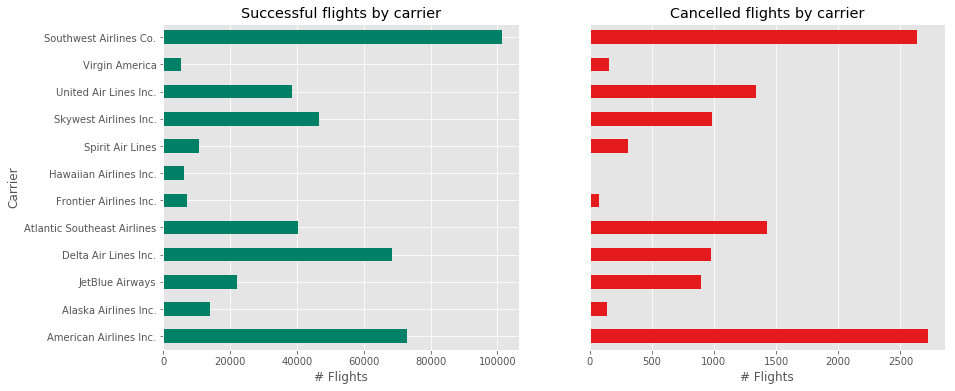

In [6]:
successful_flights_by_carrier = uc_flights.groupby(by=['CARRIER']).size().rename(carriers_dict)
cancelled_flights_by_carrier = c_flights.groupby(by=['CARRIER']).size().rename(carriers_dict)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

ax1 = successful_flights_by_carrier.plot(kind='barh', title='Successful flights by carrier', ax=axes[0], colormap='summer')
ax1.set_xlabel("# Flights")
ax1.set_ylabel("Carrier")

ax2 = cancelled_flights_by_carrier.plot(kind='barh', title='Cancelled flights by carrier', ax=axes[1], colormap='Set1')
ax2.get_yaxis().set_visible(False)
ax2.set_xlabel("# Flights")

Text(0.5,0,'% of flights cancelled')

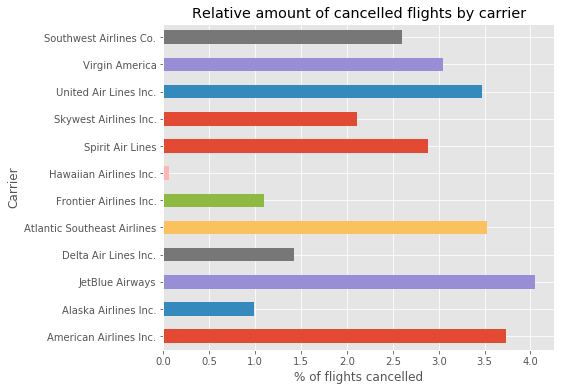

In [7]:
ax = ((cancelled_flights_by_carrier / successful_flights_by_carrier) * 100).plot(kind='barh', \
                                                                      title='Relative amount of cancelled flights by carrier',
                                                                         figsize=(7, 6))
ax.set_ylabel("Carrier")
ax.set_xlabel("% of flights cancelled")

In [8]:
c_flights[['CARRIER','CANCELLATION_CODE']].groupby(['CARRIER','CANCELLATION_CODE']).size()

CARRIER  CANCELLATION_CODE
AA       A                     232
         B                    2440
         C                      48
AS       A                      52
         B                      82
         C                       5
B6       A                      65
         B                     807
         C                      25
DL       A                      55
         B                     909
         C                      10
EV       A                     262
         B                     614
         C                     551
F9       A                       5
         B                      72
HA       A                       2
         B                       2
NK       A                      52
         B                     232
         C                      24
OO       A                     126
         B                     766
         C                      92
UA       A                      96
         B                    1119
         C                  

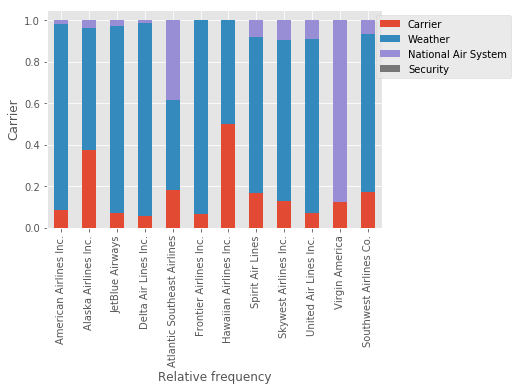

In [9]:
cancellation_reasons = {
    'A' : 'Carrier',
    'B' : 'Weather',
    'C' : 'National Air System',
    'D' : 'Security'
}
cancelled_by_carrier = c_flights[['CARRIER', 'CANCELLATION_CODE']].groupby(by=['CARRIER'])
cancelled_df = pd.DataFrame(columns=('carrier', 'A', 'B', 'C', 'D'))
#print(cancelled_by_carrier.head())
for i, v in cancelled_by_carrier:
    row = {'carrier': i, 'A': 0, 'B': 0, 'C': 0, 'D': 0}
    total = 0
    for k, n in v.groupby(by='CANCELLATION_CODE').size().iteritems():
        row[k] = n
        total += n
    for t in cancellation_reasons.keys():
        row[t] /= total
    cancelled_df = cancelled_df.append(row, ignore_index=True)

cancelled_df['carrier'] = cancelled_df['carrier'].map(carriers_dict)
ax = cancelled_df.plot(kind='bar', stacked=True, use_index=False, xticks=cancelled_df.index)
ax.set_xticklabels(cancelled_df['carrier'])
ax.set_xlabel("Relative frequency")
ax.set_ylabel("Carrier")
ax.legend([cancellation_reasons[x] for x in sorted(cancellation_reasons)], bbox_to_anchor=(1.4, 1))

In [10]:
from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
import random

def convert_to_hot_dict(v):
    return [{str(x): str(x)} for x in v]

def prepare_hot_encoders(carriers, airports):
    carrier_vec = DictVectorizer(sparse = False)
    airports_vec = DictVectorizer(sparse = False)
    carrier_vec.fit_transform(convert_to_hot_dict(carriers))
    airports_vec.fit_transform(convert_to_hot_dict(airports))
    return carrier_vec, airports_vec

In [11]:
def load_dataset(df, carrier_encoder, airport_encoder, features, hot_features, airport_data_path='airports new2.csv',
                 include_carrier=False, include_airport=False):
    carrier_hot_len = len(carrier_encoder.feature_names_)
    airport_hot_len = len(airport_encoder.feature_names_)
    
    raw_data = df.dropna(subset=['CANCELLED'])
    
    print("# cancelled flights: %d" %  raw_data[raw_data['CANCELLED'] == 1].shape[0])
    print("# uncancelled flights: %d" %  raw_data[raw_data['CANCELLED'] == 0].shape[0])
        
    # Join with airport data
    airports_data = pd.read_csv(airport_data_path)
    raw_data = pd.merge(raw_data, airports_data, how='inner', left_on='ORIGIN', right_on='iata')
    for i in raw_data.columns:
        if raw_data[i].isnull().sum() > 300000:
            raw_data.drop(i, axis = 1, inplace = True)
    print(raw_data.columns)
    raw_data.shape
    # Convert hour to readable format
    raw_data['HOUR_DEP'] = raw_data['CRS_DEP_TIME'].map(lambda x: int(str(int(x)).zfill(4)[0:2]))
    raw_data['HOUR_ARR'] = raw_data['CRS_ARR_TIME'].map(lambda x: int(str(int(x)).zfill(4)[0:2]))
        
    (n, _) = raw_data.shape
    print("Loading %d items..." % n)
    
    simple_feature_len = len(features)
    
    # Calculate hot encodes
    simple_hot_len = 0
    simple_hot = None
    if len(hot_features) > 0:
        simple_hot = OneHotEncoder()
        simple_hot.fit(raw_data[hot_features])
        simple_hot_len = sum(simple_hot.n_values_) - len(simple_hot.n_values_)
    
    total_feature_count = simple_feature_len + simple_hot_len
    actual_carrier_len = (0 if not include_carrier else carrier_hot_len)
    actual_airport_len = (0 if not include_airport else airport_hot_len)
    #x = np.zeros((n, extra_feature_count + hot_encoded_count)) # carrier and twice airport (from-to)
    x = np.zeros((n, total_feature_count + actual_carrier_len + actual_airport_len))
    
    print("Extracting features...")
    x[:,0:simple_feature_len] = raw_data[features].as_matrix()
    
    # Hot encoding for columns
    if len(hot_features) > 0:
        transformed_hots = simple_hot.transform(raw_data[hot_features].as_matrix()).toarray()
        x[:,simple_feature_len:simple_feature_len+simple_hot_len] = transformed_hots.reshape((-1, simple_hot_len))
        
    # Hot encoded airports / carrier
    if include_carrier:
        x[:, total_feature_count:total_feature_count+actual_carrier_len] = carrier_encoder.transform(
            convert_to_hot_dict(raw_data['CARRIER']))
    if include_airport:
        x[:, total_feature_count+actual_carrier_len:total_feature_count + actual_carrier_len + actual_airport_len] \
                = airport_encoder.transform(convert_to_hot_dict(raw_data['DEST']))
    
    y = raw_data['CANCELLED'].as_matrix()
    return x, y
 
    
carrier_list = flights['CARRIER'].unique()
airport_list = pd.concat([flights['ORIGIN'], flights['DEST']], axis=0).unique()
carrier_encoder, airport_encoder = prepare_hot_encoders(carrier_list, airport_list)

def load_multiple_dataset(paths, carrier_encoder, airport_encoder, features, hot_features, include_airport, include_carrier):
    print('Loading entire dataset...')
    dfs = [pd.read_csv(p) for p in paths]
    total_df = pd.concat(dfs)
    return load_dataset(total_df, carrier_encoder, airport_encoder,features=features,
                        hot_features=hot_features, include_airport=include_airport, include_carrier=include_carrier)

In [12]:
simple_copy_features = ['HOUR_DEP', 'HOUR_ARR', 'DISTANCE','long','lat']
simple_hot_features = ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK']

# Load 3 months
for incl_airport, incl_carrier in [(a, b) for a in [False, True] for b in [False, True]]:
    X, y = load_multiple_dataset(['january_2016.csv', 'february_2016.csv', 'march_2016.csv'],
                                 carrier_encoder, airport_encoder,
                                 features=simple_copy_features,
                                 hot_features=simple_hot_features,
                                include_airport=False,
                                include_carrier=False)
print('Finished all feature extraction.')


Loading entire dataset...
# cancelled flights: 23221
# uncancelled flights: 1325617
Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'CARRIER',
       'TAIL_NUM', 'FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'CANCELLED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'iata', 'airport', 'city', 'state', 'country',
       'lat', 'long'],
      dtype='object')
Loading 1347708 items...
Extracting features...
Loading entire dataset...
# cancelled flights: 23221
# uncancelled flights: 1325617
Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'CARRIER',
       'TAIL_NUM', 'FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'CANCELLED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'iata', 'airport', 'city',

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
feat_clf = ExtraTreesClassifier()
feat_clf = feat_clf.fit(X, y)
print(feat_clf.feature_importances_ )

[  8.48222661e-02   8.52047900e-02   3.64666966e-01   2.16762030e-01
   1.61688440e-01   1.02147061e-02   2.49987021e-03   6.07536323e-03
   7.98926339e-04   8.31584283e-04   1.10269100e-03   1.40585414e-04
   4.45767541e-04   1.72281004e-04   1.48208490e-04   9.85758572e-04
   6.75463950e-04   5.22399197e-04   3.45339989e-04   2.14737157e-04
   1.72741246e-04   1.93951476e-04   1.22586637e-03   4.01488436e-04
   3.79563184e-04   2.59155750e-04   1.82460864e-04   1.47502749e-04
   1.40557751e-04   6.78223674e-03   1.69512115e-02   1.74290563e-02
   1.25137851e-03   3.18032770e-04   1.25835399e-04   2.52184859e-04
   1.17715621e-03   1.81472418e-04   2.50784720e-04   1.24936656e-03
   5.56670282e-03   3.23288325e-03   2.79918918e-04   9.56575456e-04
   1.51649924e-03   1.05724247e-03]


In [21]:
from sklearn import cross_validation
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
# Create test and training set
X_train_set, X_test, y_train_set, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=42)

# Create validation set from training set
X_train, X_val, y_train, y_val= cross_validation.train_test_split(X_train_set, y_train_set, test_size=0.2, random_state=0)


In [22]:
def balance_set(xvals, yvals):
    cancelled_indices = yvals != 0
    uncancelled_indices =  yvals == 0
    cancelled_flights = yvals[cancelled_indices]
    uncancelled_flights = yvals[uncancelled_indices]
    max_balanced_flights = min(cancelled_flights.shape[0], uncancelled_flights.shape[0])

    cancelled_permutations = list(range(cancelled_flights.shape[0]))
    uncancelled_permutations = list(range(uncancelled_flights.shape[0]))
    random.shuffle(cancelled_permutations)
    random.shuffle(uncancelled_permutations)
    cancelled_selected_indices = cancelled_permutations[:max_balanced_flights]
    uncancelled_selected_indices = uncancelled_permutations[:max_balanced_flights]
    
    y_cancelled, x_cancelled = cancelled_flights[cancelled_selected_indices], \
                    xvals[cancelled_indices][cancelled_selected_indices]
    y_uncancelled, x_uncancelled = uncancelled_flights[uncancelled_selected_indices],  \
                    xvals[uncancelled_indices][uncancelled_selected_indices]

    xvals = np.concatenate([x_cancelled, x_uncancelled])
    yvals =  np.concatenate([y_cancelled, y_uncancelled])
    return xvals, yvals


In [16]:
x_train_b, y_train_b = balance_set(X_train, y_train)
x_val_b,y_val_b=balance_set(X_train,y_train)
print("Samples with cancelled: %d" % y_train_b[y_train_b != 0].shape[0])
print("Samples with non-cancelled: %d" % y_train_b[y_train_b == 0].shape[0])

Samples with cancelled: 14928
Samples with non-cancelled: 14928


In [17]:
clf=linear_model.LogisticRegression(penalty='l2',class_weight='balanced',dual=False)
clf.fit(x_train_b,y_train_b)
val_pred=clf.predict(x_val_b)
rep = precision_recall_fscore_support(y_val_b, val_pred, average='binary')
print('\nValidation results:\nPrecision = %0.2f\nRecall = %0.2f\nF1 = %0.2f\nAccuracy = %0.2f\n' % (rep[0], rep[1], rep[2], accuracy_score(y_val_b, val_pred)))


Validation results:
Precision = 0.76
Recall = 0.70
F1 = 0.73
Accuracy = 0.74



In [23]:
rfc1 = RandomForestClassifier(random_state=0)
rfc1.fit(x_train_b,y_train_b)
val_pred=rfc1.predict(x_train_b)
rep = precision_recall_fscore_support(y_val_b, val_pred, average='binary')
print('\nValidation results:\nPrecision = %0.2f\nRecall = %0.2f\nF1 = %0.2f\nAccuracy = %0.2f\n' % (rep[0], rep[1], rep[2], accuracy_score(y_val_b, val_pred)))


Validation results:
Precision = 1.00
Recall = 0.98
F1 = 0.99
Accuracy = 0.99



In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from scipy.stats import randint as sp_randint
from operator import itemgetter

In [25]:
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Parameters: {0}".format(score.parameters))
        print("")

In [26]:
#clf =  rfc = RandomForestClassifier(random_state=0)

#param_grid = {"criterion": ['entropy'],  "max_depth": list(range(1,10,1))}
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": (2,),
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
grid_search = GridSearchCV(rfc1, param_grid=param_grid,cv=10,scoring='accuracy')

grid_search.fit(x_train_b, y_train_b)
report(grid_search.grid_scores_)
val_pred = grid_search.predict(x_val_b)
print('Accuracy = %0.2f' % (accuracy_score(y_val_b, val_pred)))

Model with rank: 1
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}

Model with rank: 2
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}

Model with rank: 3
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}

Accuracy = 0.91


In [27]:
# Balance test set so that we do not reflect the unbalanced set of cancelled / uncancelled
#if balance:
x_test, y_test = balance_set(X_test, y_test)
print('Predicting test set...')
test_pred = grid_search.predict(x_test)
rep = precision_recall_fscore_support(y_test, test_pred, average='binary')
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test, test_pred)))
print('Test results:\nPrecision = %0.2f\nRecall = %0.2f\nF1 = %0.2f\nAccuracy = %0.2f\n' % (rep[0], rep[1], rep[2], accuracy_score(y_test, test_pred)))

Predicting test set...
Confusion matrix:
      0     1
0  4039   610
1   976  3673
Test results:
Precision = 0.86
Recall = 0.79
F1 = 0.82
Accuracy = 0.83

